# Analyse Factorielle des Correspondances

L'analyse factorielle des correspondances (AFC) est une technique factorielle adaptée au traitement des grands tableaux de contingence, tableaux de comptage croisant deux variables qualitatives.

Elle permet de décomposer les principales associations entre les caractéristiques (les modalités) des variables du tableau de contingence.

__Cet exemple étudie l'association entre la profession des personnes et les médias qu'ils privilégient.__

__Nous utilions le Package fanalysis__

In [12]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np

In [13]:
df = pd.read_table("data/afc_ex.txt", header=0, index_col=0)
df

Droit  Science  Medecine  IUT
CSP/Fil.                                
Exp.agri      80       99        65   58
Patron       168      137       208   63
Cadre.sup    470      400       876   79
Emp.         145      133       135   54
Ouvrier      166      193       127  129

In [14]:
X = df.values
n=np.sum(X)

In [15]:
# Ajouter la somme de répetition par ligne et par colonne 
X_ligne = np.append(X,[[np.sum(X[i])] for i in range(len(X))], axis = 1)
print(X_ligne)
X_ligne_colonne = np.append(X_ligne, [[np.sum(X_ligne[:,j]) for j in range(X_ligne.shape[1])]], axis = 0)
print(X_ligne_colonne)

[[  80   99   65   58  302]
 [ 168  137  208   63  576]
 [ 470  400  876   79 1825]
 [ 145  133  135   54  467]
 [ 166  193  127  129  615]]
[[  80   99   65   58  302]
 [ 168  137  208   63  576]
 [ 470  400  876   79 1825]
 [ 145  133  135   54  467]
 [ 166  193  127  129  615]
 [1029  962 1411  383 3785]]


In [40]:
X_profil_ligne=np.zeros((5,4))

for i in range(5):
    for j in range (4):
        X_profil_ligne[i,j]=X[i,j]/X_ligne[i,5]

print(X_profil_ligne)

X_profil_colonne=np.zeros((5,4))

for j in range(4):
    for i in range (5):
        X_profil_colonne[i,j]=X[i,j]/X_ligne_colonne[4,j]

print(X_profil_colonne)

IndexError: index 5 is out of bounds for axis 1 with size 5

In [16]:
#Récuperer les valeurs du tableau et calculer les valeurs des f_ij
X_fij = np.round(X_ligne_colonne/n, decimals = 3)
X_fij

array([[0.021, 0.026, 0.017, 0.015, 0.08 ],
       [0.044, 0.036, 0.055, 0.017, 0.152],
       [0.124, 0.106, 0.231, 0.021, 0.482],
       [0.038, 0.035, 0.036, 0.014, 0.123],
       [0.044, 0.051, 0.034, 0.034, 0.162],
       [0.272, 0.254, 0.373, 0.101, 1.   ]])

On crée une instance de la classe CA, en lui passant ici des étiquettes pour les lignes et les colonnes. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.

In [17]:
my_ca = CA(row_labels=df.index.values, col_labels=df.columns.values,n_components=2)

On estime le modèle en appliquant la méthode fit de la classe CA sur le jeu de données.

In [18]:
my_ca.fit(X)

CA(col_labels=array(['Droit', 'Science', 'Medecine', 'IUT'], dtype=object),
   n_components=2,
   row_labels=array(['Exp.agri', 'Patron', 'Cadre.sup', 'Emp.', 'Ouvrier'], dtype=object))

L'exécution de la méthode my_ca.fit(X) provoque a minima le calcul des attributs :

* my_ca.eig_ : valeurs propres
* my_ca.row_coord_ : coordonnées des points lignes
* my_ca.col_coord_ : coordonnées des points colonnes

## Analyse des valeurs propres
L'attribut my_ca.eig_ contient :

* en 1ère ligne : les valeurs propres en valeur absolue
* en 2ème ligne : les valeurs propres en pourcentage de la variance totale
* en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [19]:
#Affichage des valeurs propres
print(my_ca.eig_[0])

[0.08231106 0.00168257]


In [20]:
#Pourcentage de l'inertie exprimé par chaque axe
print(my_ca.eig_[1])

[97.3334662  1.9896516]


In [21]:
#Pourcentage cumulé de'inertie totale
print(my_ca.eig_[2])

[97.3334662 99.3231178]


Les valeurs propres peuvent être représentées graphiquement (par défaut : représentation en valeur absolue).

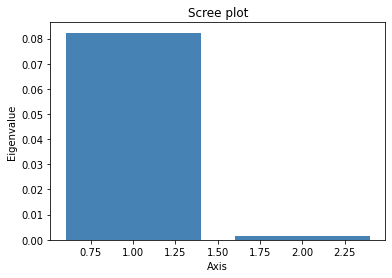

In [22]:
my_ca.plot_eigenvalues()

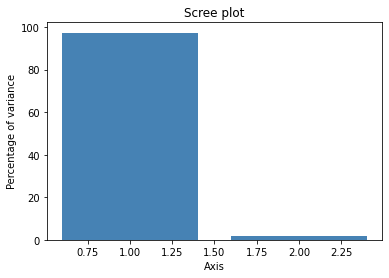

In [23]:
my_ca.plot_eigenvalues(type="percentage")

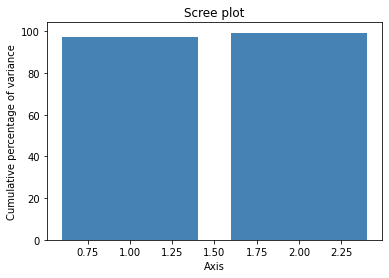

In [24]:
my_ca.plot_eigenvalues(type="cumulative")

Lors de l'exécution de la méthode my_ca.fit(X), les statistiques suivantes ont été calculées :

* my_ca.row_contrib_ : contributions des points lignes à la variance de l'axe
* my_ca.col_contrib_ : contributions des points colonnes à la variance de l'axe
* my_ca.row_cos2_ : cosinus carrés des points lignes
* my_ca.col_cos2_ : cosinus carrés des points colonnes

## Extraction des statistiques sur les points lignes

Export de la totalité des données lignes vers une DataFrame pandas

In [25]:
df_rows = my_ca.row_topandas()
print(df_rows)#patron pas bien représenté sur les deux axes
#emp pas bien représenté pour l'axe 2


           row_coord_dim1  row_coord_dim2  row_contrib_dim1  row_contrib_dim2  \
Exp.agri         0.409300       -0.025581         16.239297          3.103142   
Patron           0.023393        0.023966          0.101170          5.194893   
Cadre.sup       -0.263181       -0.015126         40.573908          6.556144   
Emp.             0.141529        0.097860          3.002494         70.223833   
Ouvrier          0.450615       -0.039309         40.083131         14.921988   

           row_cos2_dim1  row_cos2_dim2  
Exp.agri        0.987167       0.003856  
Patron          0.155557       0.163278  
Cadre.sup       0.996089       0.003290  
Emp.            0.666802       0.318797  
Ouvrier         0.992088       0.007550  


In [26]:
# Coordonnées des points lignes
print(my_ca.row_coord_)

[[ 0.40930041 -0.02558096]
 [ 0.02339255  0.02396605]
 [-0.26318069 -0.01512559]
 [ 0.14152874  0.09785957]
 [ 0.45061465 -0.0393093 ]]


In [27]:
# Contributions des points lignes
print(my_ca.row_contrib_)

[[16.23929695  3.10314153]
 [ 0.1011704   5.19489304]
 [40.57390762  6.55614431]
 [ 3.00249367 70.22383265]
 [40.08313136 14.92198847]]


In [28]:
# Cos2 des points lignes
print(my_ca.row_cos2_)

[[0.98716711 0.00385603]
 [0.155557   0.16327796]
 [0.9960894  0.00329014]
 [0.66680164 0.31879679]
 [0.99208846 0.00754971]]


## Extraction des statistiques sur les points colonnes

Export de la totalité des données colonnes vers une DataFrame pandas

In [29]:
df_cols = my_ca.col_topandas()
print(df_cols)##droit pas bien représenté sur l'axe 1
#droit le seul bien représenté pour l'axe 2

          col_coord_dim1  col_coord_dim2  col_contrib_dim1  col_contrib_dim2  \
Droit           0.028124        0.060061          0.261244         58.285261   
Science         0.160310        0.003275          7.935510          0.162003   
Medecine       -0.303205       -0.029529         41.636552         19.318997   
IUT             0.638808       -0.060803         50.166694         22.233739   

          col_cos2_dim1  col_cos2_dim2  
Droit          0.168338       0.767729  
Science        0.944570       0.000394  
Medecine       0.990315       0.009393  
IUT            0.988647       0.008957  


In [30]:
# Coordonnées des points colonnes
print(my_ca.col_coord_)

[[ 0.02812404  0.0600608 ]
 [ 0.16031048  0.00327487]
 [-0.30320469 -0.02952897]
 [ 0.63880807 -0.06080319]]


In [31]:
# Contributions des points colonnes
print(my_ca.col_contrib_)

[[ 0.26124428 58.28526088]
 [ 7.9355098   0.16200322]
 [41.6365519  19.31899651]
 [50.16669403 22.2337394 ]]


In [32]:
# Cos2 des points colonnes
print(my_ca.col_cos2_)#tous bien représentés

[[1.68337672e-01 7.67729312e-01]
 [9.44570308e-01 3.94183044e-04]
 [9.90315076e-01 9.39286421e-03]
 [9.88647476e-01 8.95680948e-03]]


## Représentation graphique

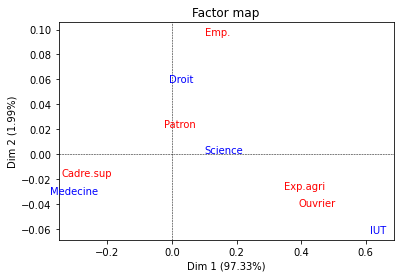

In [33]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont
#les axes 1 et 2 qui sont ici représentés
my_ca.mapping(num_x_axis=1, num_y_axis=2)
#donc ceux issus de parents cadre sup vont en médecine et ceux issus de exp agri et ouvrier vont en iut
#meme emp et science

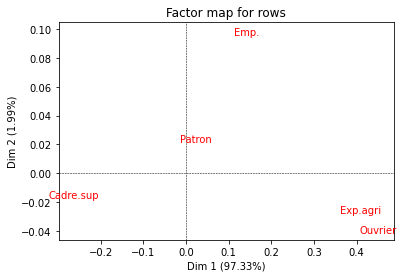

In [34]:
# Mapping des points lignes
my_ca.mapping_row(num_x_axis=1, num_y_axis=2)
#cadre sup s'oppose à exp agri et ouvrier pour l'axe 1
#emp correlé pos à l'axe 2

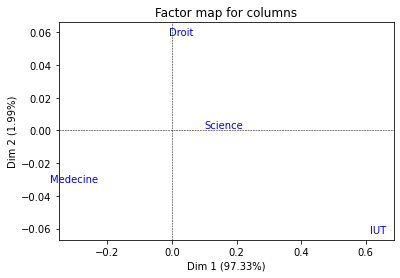

In [35]:
# Mapping des points colonnes
my_ca.mapping_col(num_x_axis=1, num_y_axis=2)
#médecine et IUT s'oppose sur l'axe 1
#droit corrélé pos à l'axe 2

Analyse du 1er axe - Points lignes

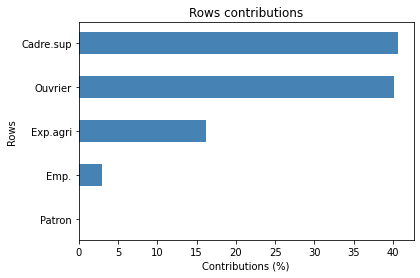

In [36]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_ca.plot_row_contrib(num_axis=1)

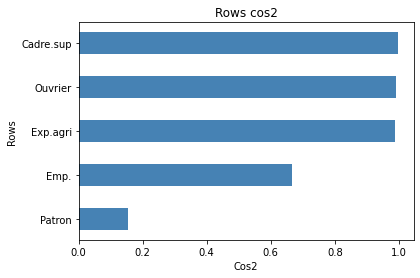

In [37]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_ca.plot_row_cos2(num_axis=1)

Analyse du 1er axe - Points colonne

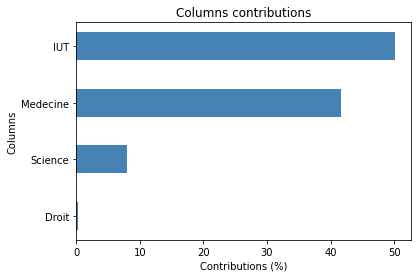

In [38]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_ca.plot_col_contrib(num_axis=1)

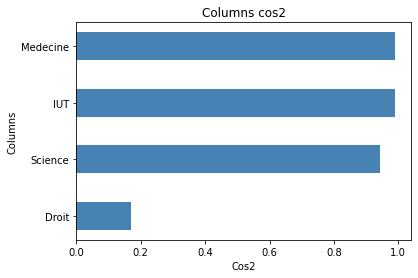

In [39]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_ca.plot_col_cos2(num_axis=1)